In [6]:
import pandas as pd

df = pd.read_csv("rawdata.csv")

zipcode_means = df.groupby('ZipCode').agg({'CO': 'mean', 'NO2': 'mean', 'PM2.5': 'mean', 'PM10': 'mean', 
                                           'O3': 'mean', 'SO2': 'mean', 'aqi': 'mean'})

def max_category(series):
    if not series.empty:
        return series.value_counts().idxmax()
    else:
        return None

aqi_columns = ['CO', 'SO2', 'PM2.5', 'NO2', 'PM10', 'O3', 'aqi']
for aqi_column in aqi_columns:
    df[aqi_column] = df[aqi_column].apply(lambda x: x if not pd.isna(x) else None)

non_empty_data = df.dropna(subset=['category'])
zipcode_means['category'] = non_empty_data.groupby('ZipCode')['category'].apply(max_category)

zipcode_means[['latitude', 'longitude']] = df.groupby('ZipCode')[['latitude', 'longitude']].first()

zipcode_means.head()
zipcode_means.to_csv('avg_aqi_google.csv')


In [4]:
df.category.unique()

array(['Good air quality', 'Moderate air quality'], dtype=object)

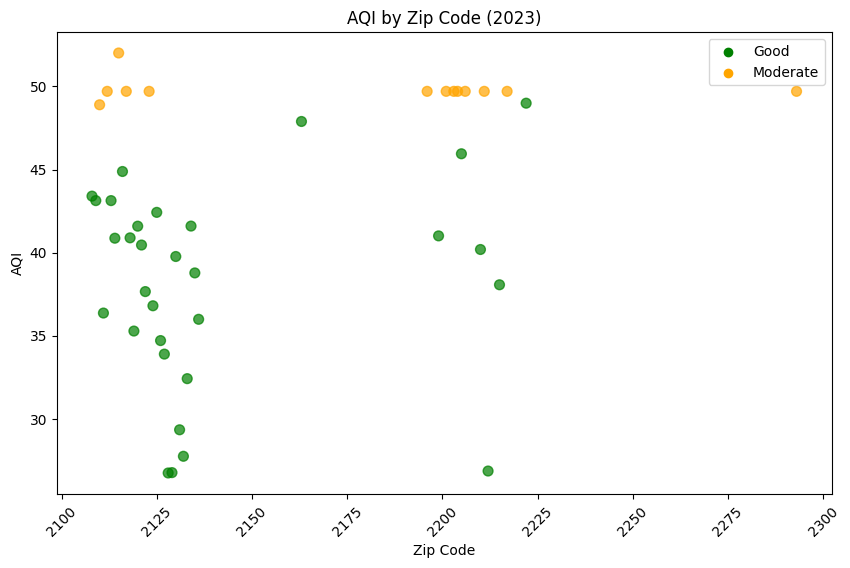

Zip Codes with Moderate AQI


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('avg_aqi_google.csv')

def map_category_to_color(category):
    if category == 'Good air quality':
        return 'green'
    elif category == 'Moderate air quality':
        return 'orange'
    else:
        return 'blue'  
    
data['CategoryColor'] = data['category'].apply(map_category_to_color)

#zip_code_range = (2100, 2225) 
#filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
filtered_data = data.copy()

plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['aqi'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

#plt.xlim(zip_code_range)

plt.show()

red_aqi_zip_codes = filtered_data[filtered_data['aqi'] == 'Moderate air quality']['ZipCode']

print("Zip Codes with Moderate AQI")
for zip_code in red_aqi_zip_codes.unique():
    print(zip_code)


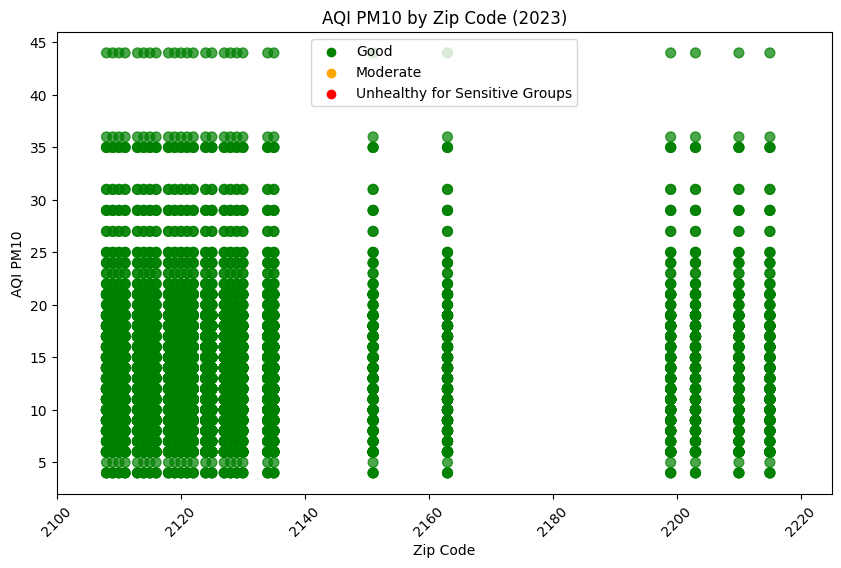

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  

data['CategoryColor'] = data['CategoryName_PM10'].apply(map_category_to_color)

zip_code_range = (2100, 2225) 
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]
plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM10'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM10 by Zip Code (2023)')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM10')
plt.xticks(rotation=45)

legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

plt.xlim(zip_code_range)


plt.show()


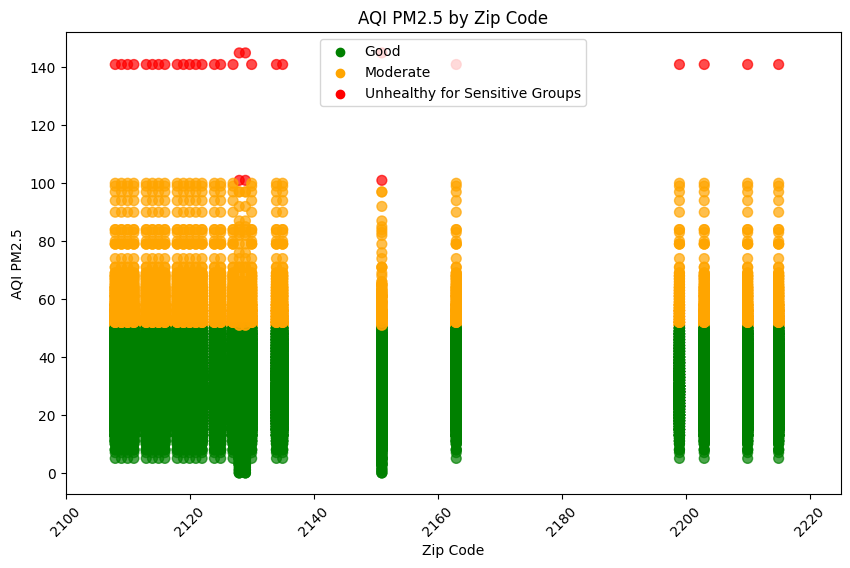

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('filtered_air_quality_data.csv')

def map_category_to_color(category):
    if category == 'Good':
        return 'green'
    elif category == 'Moderate':
        return 'orange'
    elif category == 'Unhealthy for Sensitive Groups':
        return 'red'
    else:
        return 'blue'  # You can add more colors for other categories

# Map the CategoryName to colors
data['CategoryColor'] = data['CategoryName_PM2.5'].apply(map_category_to_color)

# Define the range of zip codes you want to display
zip_code_range = (2100, 2225)  # Adjust this range as needed

# Filter the data to include only the selected zip code range
filtered_data = data[(data['ZipCode'] >= zip_code_range[0]) & (data['ZipCode'] <= zip_code_range[1])]

# Create the scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(filtered_data['ZipCode'], filtered_data['AQI_PM2.5'], c=filtered_data['CategoryColor'], s=50, alpha=0.7)
plt.title('AQI PM2.5 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('AQI PM2.5')
plt.xticks(rotation=45)

# Create a legend for the categories
legend_labels = {
    'Good': 'green',
    'Moderate': 'orange',
    'Unhealthy for Sensitive Groups': 'red',
}
for category, color in legend_labels.items():
    plt.scatter([], [], label=category, color=color)

plt.legend()

# Set the x-axis limits to your desired zip code range
plt.xlim(zip_code_range)


plt.show()
